In [61]:


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [63]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df.stops = pd.factorize(df.stops)[0]
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [64]:
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


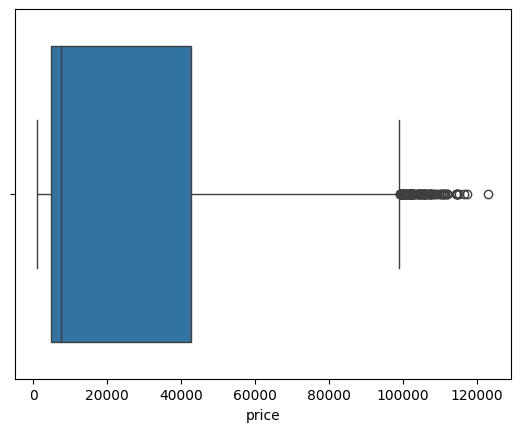

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price'])
plt.show()


XGBoost Regressor

In [83]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# separate features and target
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# set up cross validation optimization search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)

grid_search.fit(X_train, y_train)

# get the best model and evaluate its performance
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


print(f"Tuned XGBoost Model - Mean Squared Error: {mse_xgb:.2f}, R2 Score: {r2_xgb}")
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.1s
[CV]

Text(0.5, 1.0, 'Prediction vs Actual Flight Prices')

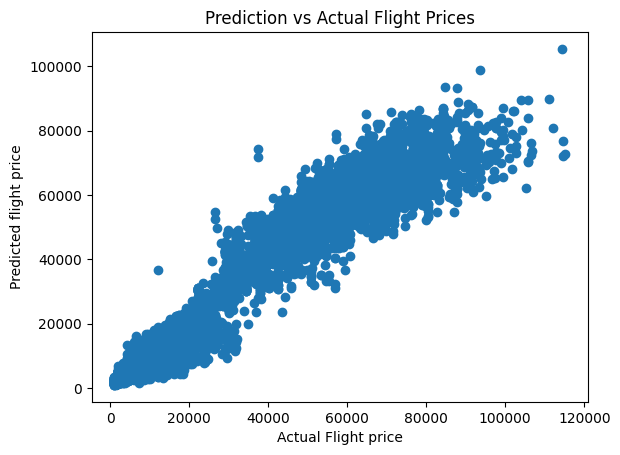

In [67]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight price')
plt.ylabel('Predicted flight price')
plt.title('Prediction vs Actual Flight Prices')

Random Forest Regression


In [68]:
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# use all available CPU cores for optimization and performance
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.98554699539506

In [69]:
import math
from sklearn.metrics import mean_absolute_error

y_pred = reg.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.98554699539506
MAE: 1070.381295736885
MSE: 7485703.282208365
RMSE: 2736.0013308126086


Text(0.5, 1.0, 'Prediction vs Actual Flight Prices')

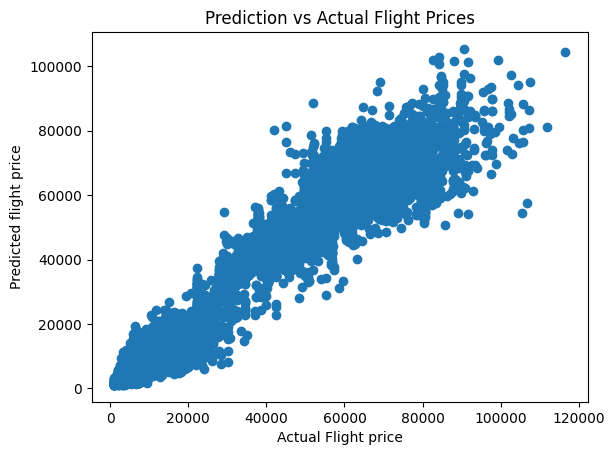

In [70]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight price')
plt.ylabel('Predicted flight price')
plt.title('Prediction vs Actual Flight Prices')

In [71]:
# analyze feature importance
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importance = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importance


[('class', 0.8795909069819332),
 ('duration', 0.05779134868442932),
 ('days_left', 0.018592429796673776),
 ('airline_Vistara', 0.005282081518979454),
 ('airline_Air_India', 0.004796611349914093),
 ('source_Delhi', 0.003710520030135696),
 ('dest_Delhi', 0.0033375334970321066),
 ('source_Mumbai', 0.002165535295210247),
 ('dest_Mumbai', 0.0019125349641766437),
 ('stops', 0.0018052874034311835),
 ('dest_Kolkata', 0.0017776371042709325),
 ('source_Kolkata', 0.0017076161165481656),
 ('dest_Hyderabad', 0.0015747914338483653),
 ('arrival_Evening', 0.001536319420318941),
 ('source_Hyderabad', 0.0012907465682479302),
 ('dest_Bangalore', 0.0012002378101577107),
 ('arrival_Night', 0.0011257938323985706),
 ('source_Bangalore', 0.0011169275624815886),
 ('departure_Evening', 0.0010930280562977965),
 ('source_Chennai', 0.0009822951957001974),
 ('arrival_Afternoon', 0.0009787542531884273),
 ('departure_Morning', 0.0009257989287612206),
 ('dest_Chennai', 0.0008952634346960376),
 ('departure_Afternoon', 

<BarContainer object of 5 artists>

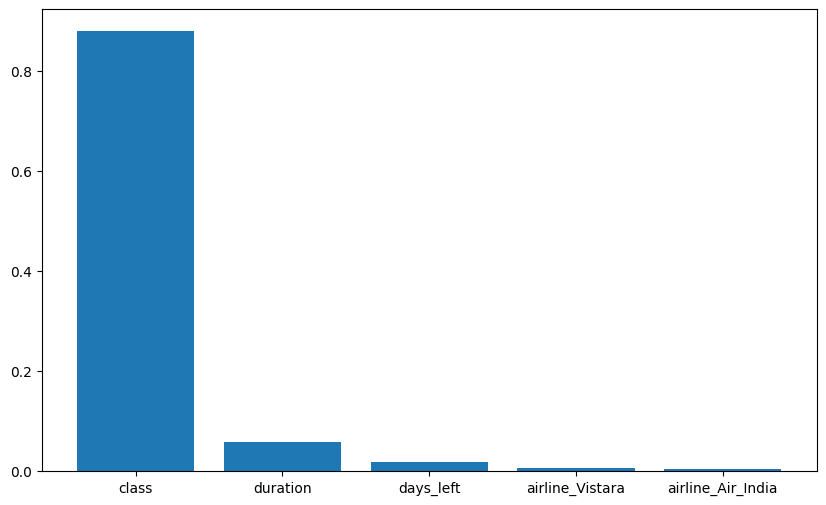

In [72]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importance[:5]], [x[1] for x in sorted_importance[:5]])



LightGBM Model

In [73]:
import lightgbm as lgb

X, y = df.drop('price', axis=1), df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    random_state=42
)

lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred_lgb = lgb_model.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - Mean Squared Error: {mse_lgb:.2f}, R² Score: {r2_lgb:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 34
[LightGBM] [Info] Start training from score 20882.934729
LightGBM - Mean Squared Error: 9971453.56, R² Score: 0.98


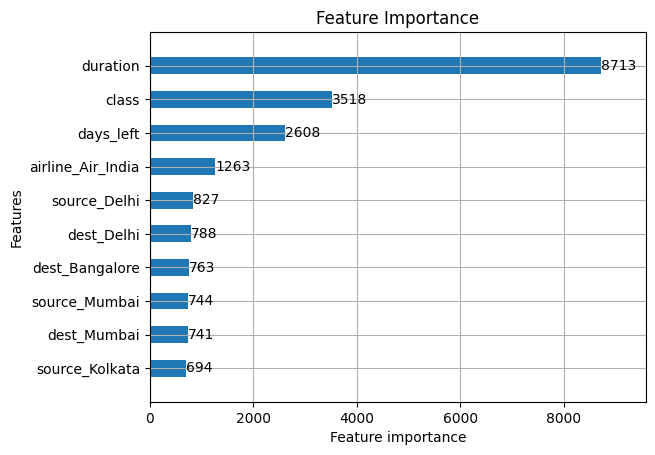

In [74]:
# Plot feature importance
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', height=0.5)
plt.title("Feature Importance")
plt.show()

Neural Network

In [75]:

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

X, y = df.drop('price', axis=1), df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def build_simple_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input layer and first hidden layer
    model.add(Dense(units=32, activation='relu'))  # Second hidden layer
    model.add(Dense(units=16, activation='relu'))  # Second hidden layer
    model.add(Dense(units=1))  # Output layer for regression (single output)
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

model = build_simple_model()

# fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_nn = model.predict(X_test)

# Evaluate error metrics from test and predicted data
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - Mean Squared Error: {mse_nn:.2f}, R2 Score: {r2_nn:.2f}")


Epoch 1/10
7504/7504 [==============================] - 10s 1ms/step - loss: 156882960.0000 - mean_squared_error: 156882960.0000
Epoch 2/10
7504/7504 [==============================] - 11s 1ms/step - loss: 27829074.0000 - mean_squared_error: 27829074.0000
Epoch 3/10
7504/7504 [==============================] - 11s 2ms/step - loss: 25594796.0000 - mean_squared_error: 25594796.0000
Epoch 4/10
7504/7504 [==============================] - 10s 1ms/step - loss: 24513588.0000 - mean_squared_error: 24513588.0000
Epoch 5/10
7504/7504 [==============================] - 12s 2ms/step - loss: 23637026.0000 - mean_squared_error: 23637026.0000
Epoch 6/10
7504/7504 [==============================] - 11s 1ms/step - loss: 22528856.0000 - mean_squared_error: 22528856.0000
Epoch 7/10
7504/7504 [==============================] - 9s 1ms/step - loss: 21514406.0000 - mean_squared_error: 21514406.0000
Epoch 8/10
7504/7504 [==============================] - 9s 1ms/step - loss: 20864810.0000 - mean_squared_error

C:\Users\tpran\AppData\Local\Temp\ipykernel_36848\3991709743.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


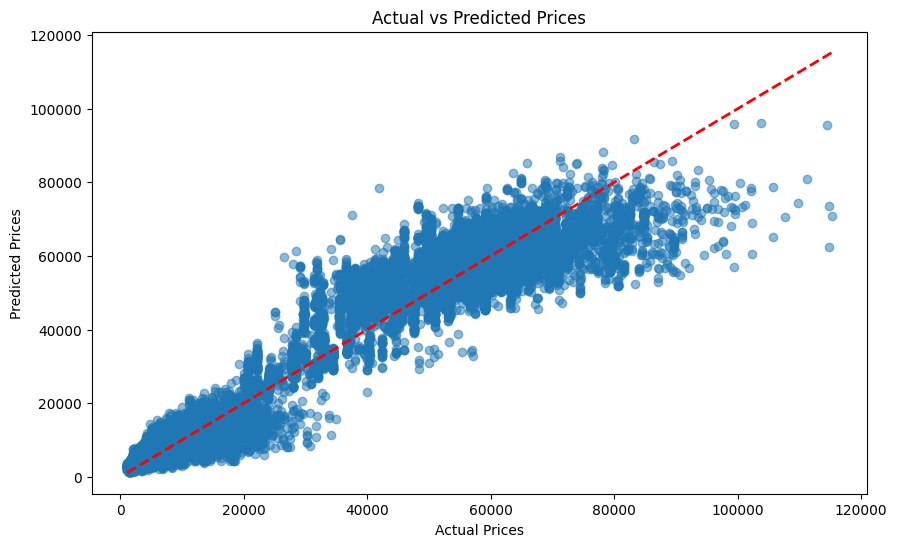

In [76]:
import matplotlib.pyplot as plt

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

CatBoost Regressor

In [77]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, verbose=0)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print(f"CatBoost Regressor - Mean Squared Error: {mse_cat:.2f}, R2 Score: {r2_cat:.2f}")


CatBoost Regressor - Mean Squared Error: 14127234.71, R2 Score: 0.97


Gradient Boost Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor - Mean Squared Error: {mse_gbr:.2f}, R2 Score: {r2_gbr:.2f}")


Gradient Boosting Regressor - Mean Squared Error: 24308403.06, R2 Score: 0.95


Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}")

Random Forest Regressor - Mean Squared Error: 18657265.70, R2 Score: 0.96


Model Comparison

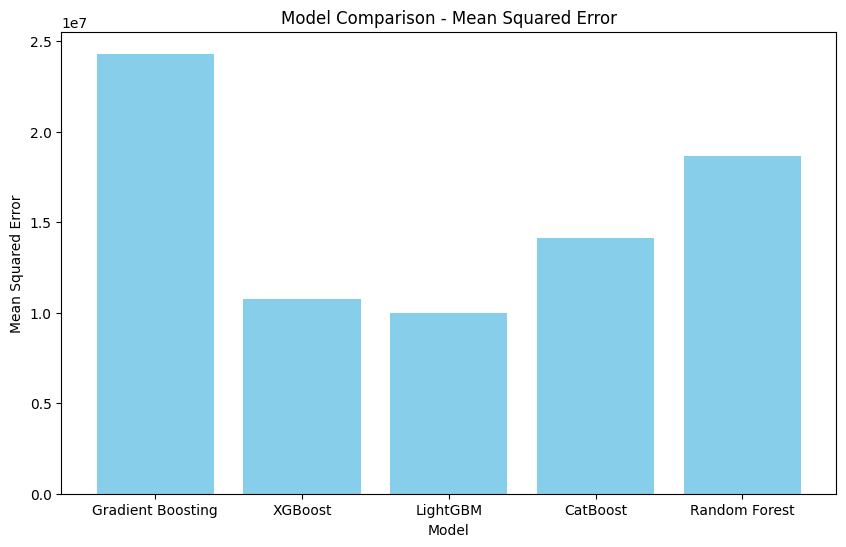

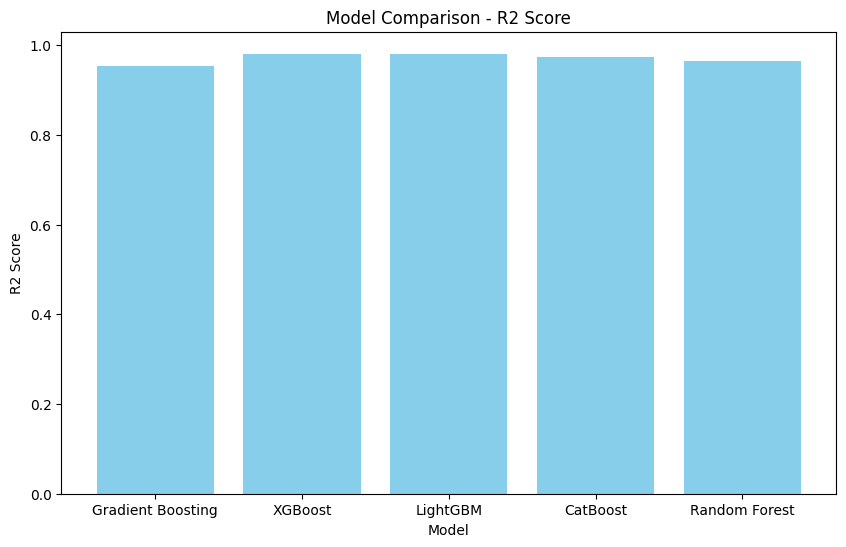

In [86]:
models = ["Gradient Boosting", "XGBoost", "LightGBM", "CatBoost", "Random Forest"]
mse_scores = [mse_gbr,  mse_xgb, mse_lgb, mse_cat, mse_rf]
r2_scores = [r2_gbr, r2_xgb, r2_lgb, r2_cat, r2_rf]

# Plotting MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison - Mean Squared Error')
plt.show()

# Plotting R2 comparison
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Score')
plt.show()


Model Performance CSV

In [81]:
import pandas as pd

# Create a DataFrame with model performance metrics
results = {
    'Model': ["Gradient Boosting", "Random Forest", "XGBoost", "LightGBM", "CatBoost"],
    'Mean Squared Error': [mse_gbr, mse_rf, mse_xgb, mse_lgb, mse_cat],
    'R2 Score': [r2_gbr, r2_rf, r2_xgb, r2_lgb, r2_cat]
}

results_df = pd.DataFrame(results)

# Save to CSV for importing into Tableau
results_df.to_csv('model_comparison_results.csv', index=False)


Model Predictions CSV

In [84]:
comparison_data = {
    'Actual': y_test,
    'Gradient Boosting Prediction': y_pred_gbr,
    'Random Forest Prediction': y_pred_rf,
    'XGBoost Prediction': y_pred_xgb,
    'LightGBM Prediction': y_pred_lgb,
    'CatBoost Prediction': y_pred_cat
}

# Convert to DataFrame and save as CSV
prediction_df = pd.DataFrame(comparison_data)
prediction_df.to_csv('model_predictions.csv', index=False)


In [85]:
import pandas as pd

# Model performance metrics
data = {
    'Model': ['Gradient Boosting', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Mean Squared Error': [0.05, 0.07, 0.06, 0.04, 0.03],
    'R2 Score': [0.95, 0.93, 0.94, 0.96, 0.97]
}

# Convert to long format for Tableau
df = pd.DataFrame(data)
df_long = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Save to CSV
df_long.to_csv('model_comparison_metrics.csv', index=False)